<h1>Step one- understand the problem</h1>
<h2>Endometriosis</h2> Endometriosis is a condition where tissue similar to the lining of your uterus grows on other parts of your body. When this tissue grows in the wrong places, it can cause you to experience uncomfortable symptoms that can impact your daily life. Some people with endometriosis also have issues getting pregnant.
The endometrium is the inner lining of your uterus. This tissue is what you shed during a menstrual period.
When you have endometriosis, endometrial-like tissue grows on other organs or structures. This tissue can grow within your abdomen, pelvis or even chest. This tissue is hormonally sensitive and can become inflamed during your menstrual cycle.
<img src = 'https://my.clevelandclinic.org/-/scassets/images/org/health/articles/10857-endometriosis'>

Complications of Endometriosis can include:

- Infertility
- Endometriosis-associated adenocarcinoma (cancer)


**Now that we know all about the disease, we can finally define the problem statement** - <h1>Using the provided dataset, devise a way to predict Endometriosis for a given patient</h1>

<h2> First, the imports </h2>

In [67]:
# Pandas library is a tool for data scientists to explore and manipulate data

import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h2> Quick glance at the data </h2>

In [69]:
# put 'r' before the path string to address any special characters in the path, such as '\'
# df = pd.read_csv (r'Path where the CSV file is stored\File name.csv')

df = pd.read_csv (r'../datasets/endometriosis-datasets/endo_dataset.csv')
# print (df.head())

df.head(10) # shows first 10 rows

,Heavy / Extreme menstrual bleeding,Menstrual pain (Dysmenorrhea),Painful / Burning pain during sex (Dyspareunia),Pelvic pain,Irregular / Missed periods,Cramping,Abdominal pain / pressure,Back pain,Painful bowel movements,Nausea,...,Fever,Hormonal problems,Bloating,Feeling sick,Decreased energy / Exhaustion,Abdominal Cramps during Intercourse,Insomnia / Sleeplessness,Acne / pimples,Loss of appetite,Endometriosis_YN
0,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,0,0,0,1
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,0,0,1,1
2,0,1,0,1,1,1,0,1,0,1,...,0,0,1,1,1,0,1,0,0,1
3,1,0,0,0,0,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,1,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
7,1,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
8,0,1,0,1,1,1,1,1,1,1,...,0,0,0,1,1,0,1,1,0,1
9,0,0,1,1,1,1,1,1,0,0,...,0,0,1,1,0,1,0,1,0,1


In [70]:
#Shape of the dataset
df.shape

(886, 59)

In [71]:
#Dataset variables
df.columns

Index(['Heavy / Extreme menstrual bleeding', 'Menstrual pain (Dysmenorrhea)',
       'Painful / Burning pain during sex (Dyspareunia)', 'Pelvic pain',
       'Irregular / Missed periods', 'Cramping', 'Abdominal pain / pressure',
       'Back pain', 'Painful bowel movements', 'Nausea', 'Menstrual clots',
       'Infertility', 'Painful cramps during period', 'Pain / Chronic pain',
       'Diarrhea', 'Long menstruation', 'Constipation / Chronic constipation',
       'Vomiting / constant vomiting', 'Fatigue / Chronic fatigue',
       'Painful ovulation', 'Stomach cramping', 'Migraines',
       'Extreme / Severe pain', 'Leg pain', 'Irritable Bowel Syndrome (IBS)',
       'Syncope (fainting, passing out)', 'Mood swings', 'Depression',
       'Bleeding', 'Lower back pain', 'Fertility Issues', 'Ovarian cysts',
       'Painful urination', 'Headaches', 'Constant bleeding',
       'Pain after Intercourse', 'Digestive / GI problems',
       'IBS-like symptoms', 'Excessive bleeding', 'Anaemia / Iro

In [7]:
# prints the summary of the data
df.describe()

,Heavy / Extreme menstrual bleeding,Menstrual pain (Dysmenorrhea),Painful / Burning pain during sex (Dyspareunia),Pelvic pain,Irregular / Missed periods,Cramping,Abdominal pain / pressure,Back pain,Painful bowel movements,Nausea,...,Fever,Hormonal problems,Bloating,Feeling sick,Decreased energy / Exhaustion,Abdominal Cramps during Intercourse,Insomnia / Sleeplessness,Acne / pimples,Loss of appetite,Endometriosis_YN
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,...,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,0.432280,0.432280,0.413093,0.490971,0.302483,0.547404,0.408578,0.542889,0.295711,0.381490,...,0.172686,0.257336,0.397291,0.343115,0.376975,0.227991,0.297968,0.250564,0.274266,0.534989
std,0.495673,0.495673,0.492667,0.500201,0.459593,0.498029,0.491849,0.498438,0.456619,0.486027,...,0.378189,0.437413,0.489614,0.475018,0.484902,0.419774,0.457624,0.433583,0.446396,0.499056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2>Exploratory data analysis</h2>

In [8]:
# No of missing data points per column
missing_values_count = df.isnull().sum()
missing_values_count

Heavy / Extreme menstrual bleeding                 0
Menstrual pain (Dysmenorrhea)                      0
Painful / Burning pain during sex (Dyspareunia)    0
Pelvic pain                                        0
Irregular / Missed periods                         0
Cramping                                           0
Abdominal pain / pressure                          0
Back pain                                          0
Painful bowel movements                            0
Nausea                                             0
Menstrual clots                                    0
Infertility                                        0
Painful cramps during period                       0
Pain / Chronic pain                                0
Diarrhea                                           0
Long menstruation                                  0
Constipation / Chronic constipation                0
Vomiting / constant vomiting                       0
Fatigue / Chronic fatigue                     

In [9]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

#percentage of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [13]:
# No of categorical and numerical variables
df.dtypes.value_counts()

int64    59
Name: count, dtype: int64

In [77]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.7
high_corr = [column for column in upper.columns if any(upper[column] > 0.7)]


In [78]:
high_corr

['Bleeding', 'Lower back pain', 'Endometriosis_YN']

In [79]:
# Select upper triangle of correlation matrix
lower = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.5
low_corr = [column for column in lower.columns if any(lower[column] < 0.5)]

low_corr

['Painful / Burning pain during sex (Dyspareunia)',
 'Pelvic pain',
 'Irregular / Missed periods',
 'Cramping',
 'Abdominal pain / pressure',
 'Back pain',
 'Painful bowel movements',
 'Nausea',
 'Menstrual clots',
 'Infertility',
 'Painful cramps during period',
 'Pain / Chronic pain',
 'Diarrhea',
 'Long menstruation',
 'Constipation / Chronic constipation',
 'Vomiting / constant vomiting',
 'Fatigue / Chronic fatigue',
 'Painful ovulation',
 'Stomach cramping',
 'Migraines',
 'Extreme / Severe pain',
 'Leg pain',
 'Irritable Bowel Syndrome (IBS)',
 'Syncope (fainting, passing out)',
 'Mood swings',
 'Depression',
 'Bleeding',
 'Lower back pain',
 'Fertility Issues',
 'Ovarian cysts',
 'Painful urination',
 'Headaches',
 'Constant bleeding',
 'Pain after Intercourse',
 'Digestive / GI problems',
 'IBS-like symptoms',
 'Excessive bleeding',
 'Anaemia / Iron deficiency',
 'Hip pain',
 'Vaginal Pain/Pressure',
 'Sharp / Stabbing pain',
 'Bowel pain',
 'Anxiety',
 'Cysts (unspecified)',


In [80]:
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corrMatrix.unstack().sort_values()
  
print(sorted_mat)

Fever                         Endometriosis_YN               -0.142806
Endometriosis_YN              Fever                          -0.142806
Painful cramps during period  Fever                          -0.047432
Fever                         Painful cramps during period   -0.047432
                              Fatigue / Chronic fatigue      -0.031850
                                                                ...   
Headaches                     Headaches                       1.000000
Painful urination             Painful urination               1.000000
Ovarian cysts                 Ovarian cysts                   1.000000
Bleeding                      Bleeding                        1.000000
Endometriosis_YN              Endometriosis_YN                1.000000
Length: 3481, dtype: float64


<Axes: xlabel='Skewness', ylabel='Density'>

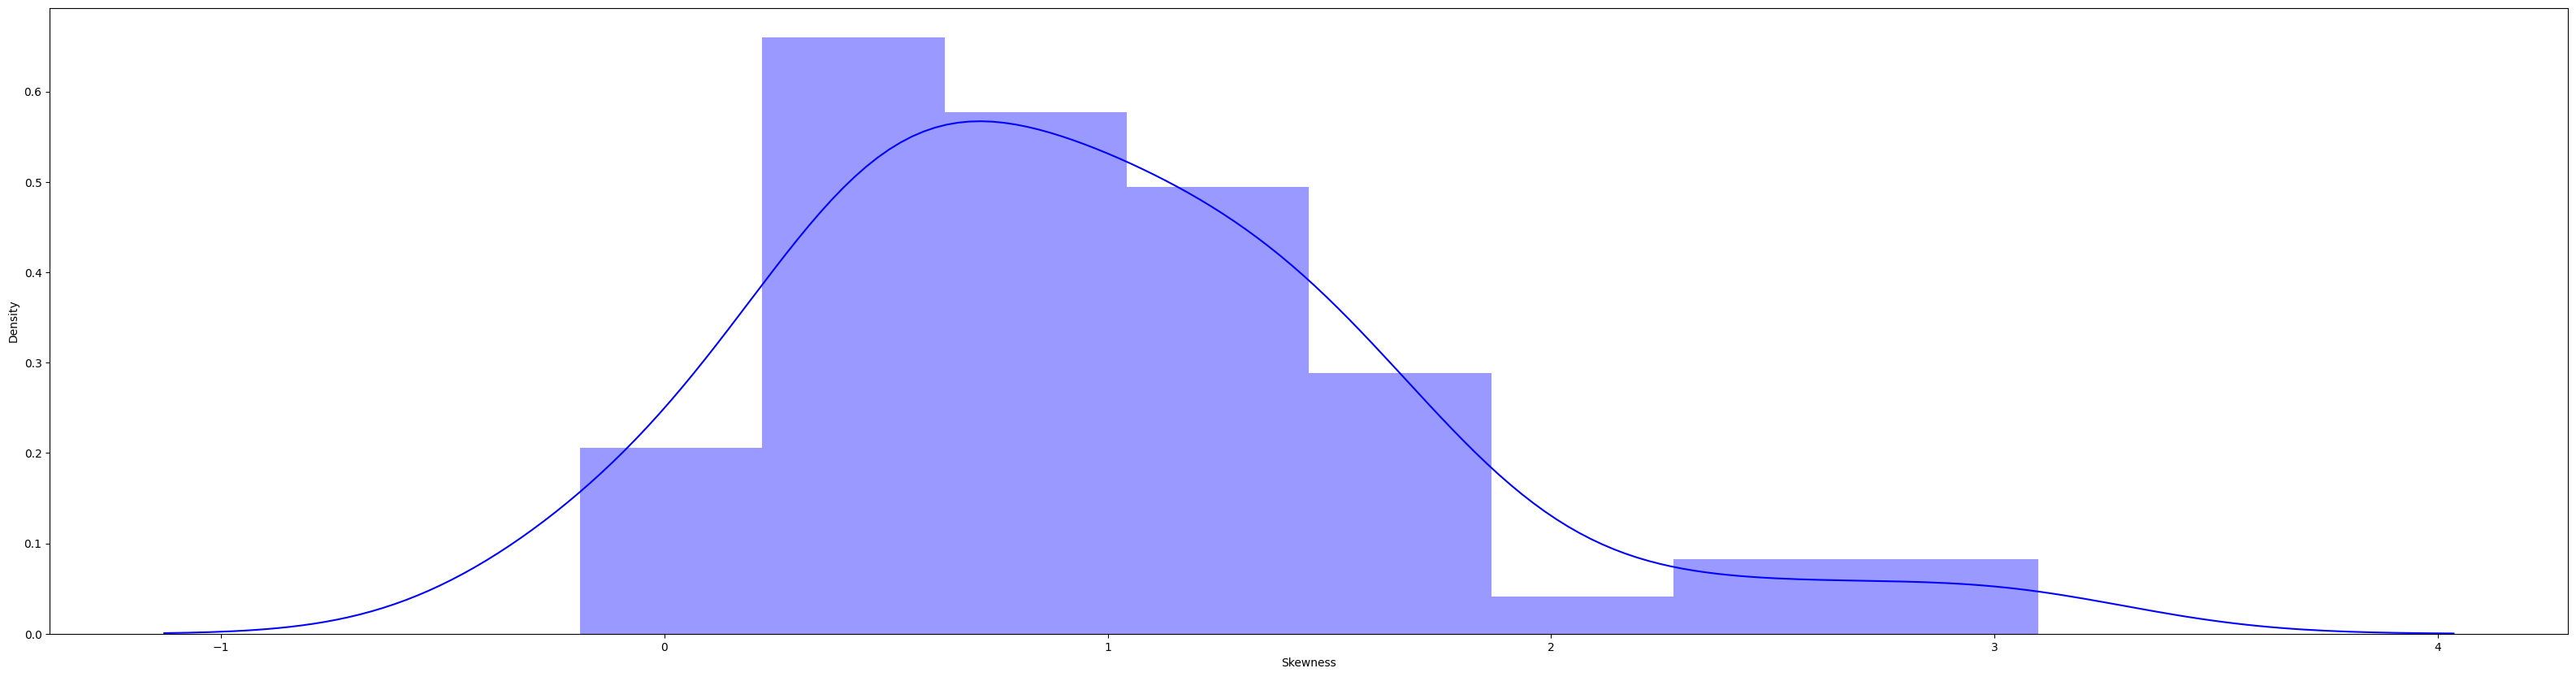

In [81]:
#Skewness
import seaborn as sns
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')

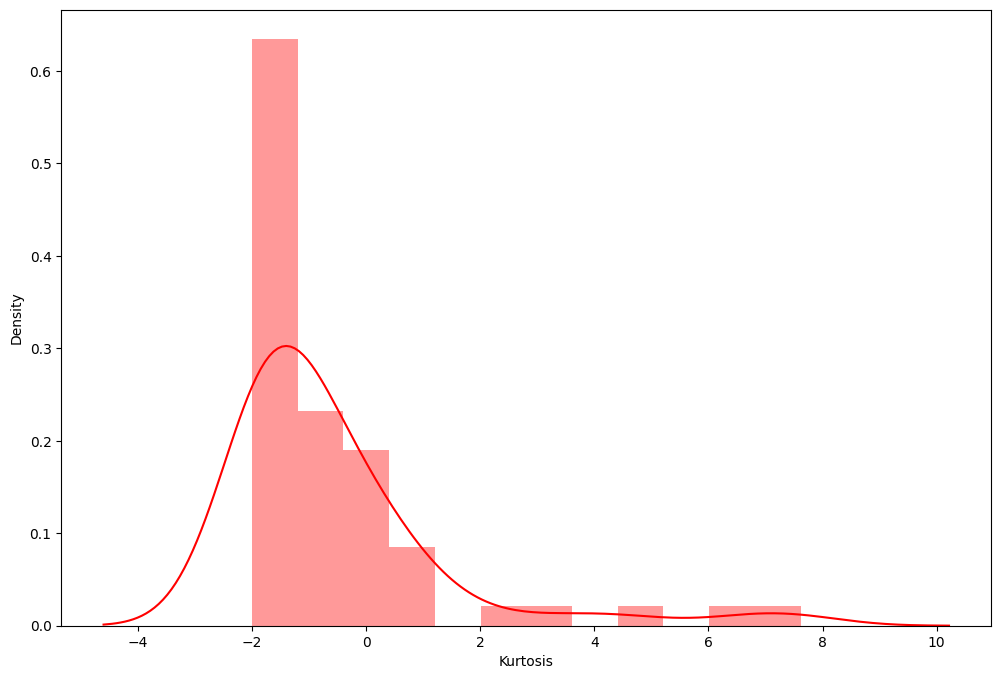

In [82]:
#Kurtosis
plt.figure(figsize = (12,8))
sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

In [83]:
#Correlation of variables with Endometriosis
corrMatrix = df.corr()
print(corrMatrix['Endometriosis_YN'].sort_values(ascending = False),'\n')

Endometriosis_YN                                   1.000000
Menstrual pain (Dysmenorrhea)                      0.713039
Painful cramps during period                       0.611767
Cramping                                           0.602516
Fatigue / Chronic fatigue                          0.598330
Heavy / Extreme menstrual bleeding                 0.594275
Bleeding                                           0.569073
Pelvic pain                                        0.567080
Abdominal pain / pressure                          0.563149
Painful / Burning pain during sex (Dyspareunia)    0.552379
Painful bowel movements                            0.495025
Ovarian cysts                                      0.491360
Back pain                                          0.489094
Bloating                                           0.484099
Lower back pain                                    0.483313
Sharp / Stabbing pain                              0.482743
Menstrual clots                         

<Axes: title={'center': 'Correlation of Features with Endometriosis'}>

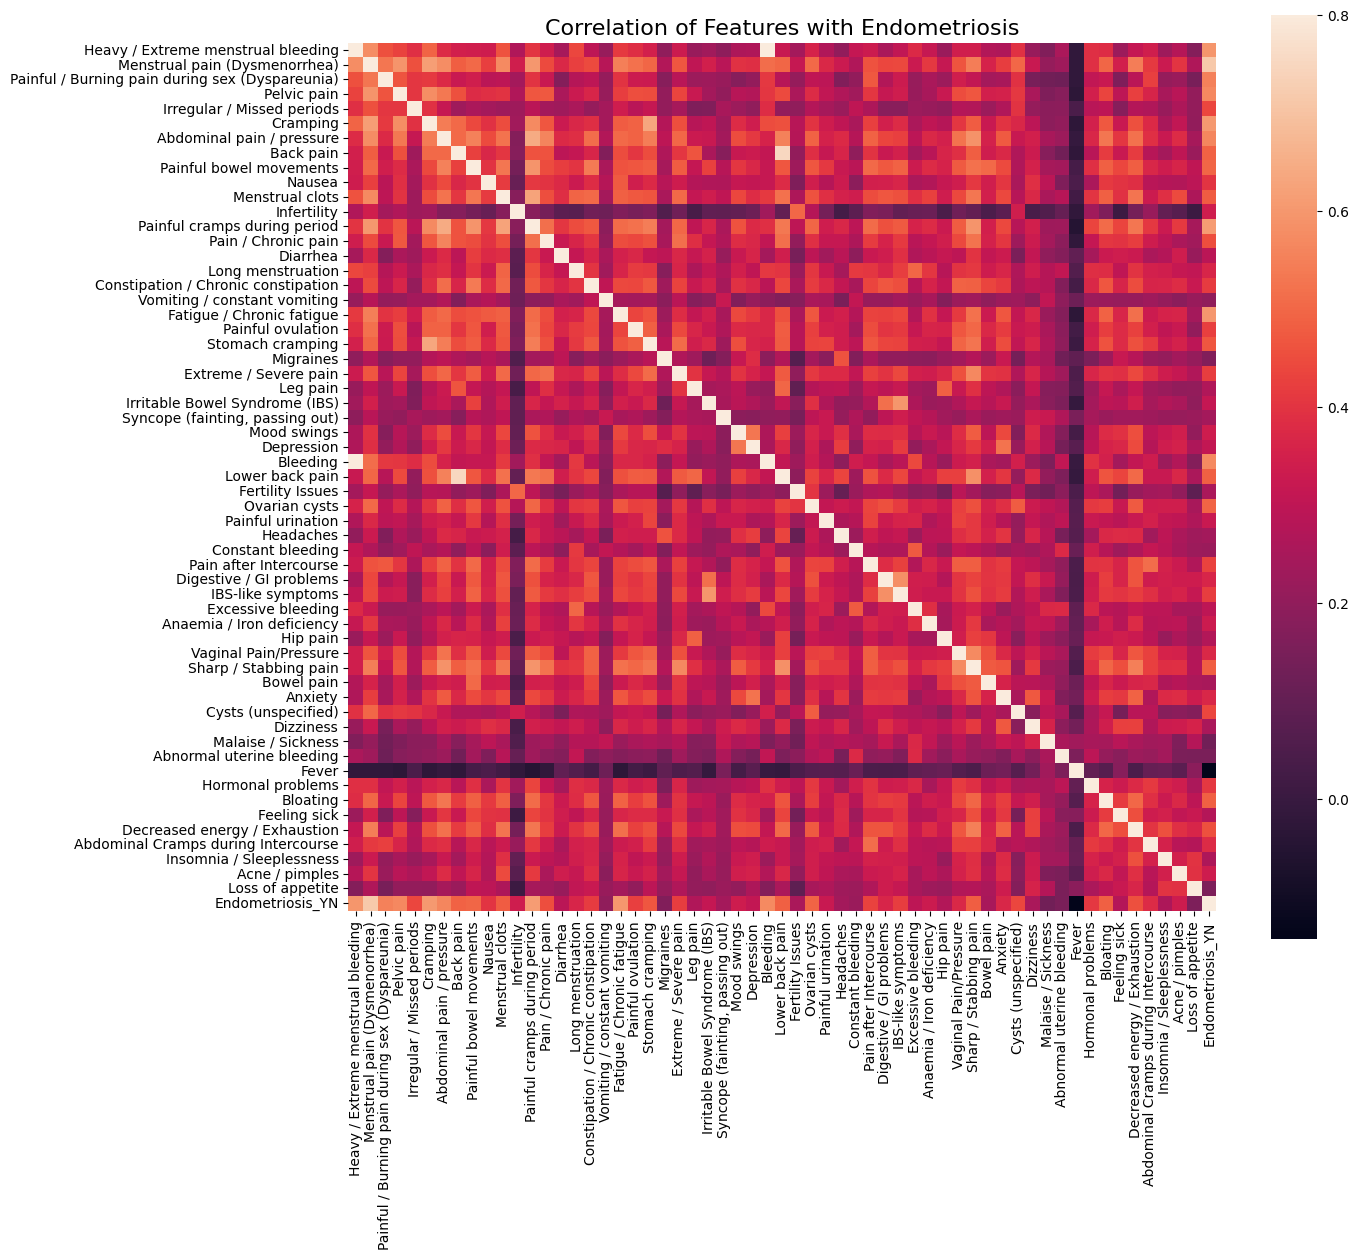

In [84]:
#Correlation plot
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Features with Endometriosis',y=1,size=16)

sns.heatmap(corrMatrix,square = True,  vmax=0.8)

In [85]:
# Selecting features with correlation > 0.45 for the analysis
df1 = df[['Menstrual pain (Dysmenorrhea)', 'Painful cramps during period', 'Cramping', 'Fatigue / Chronic fatigue',
       'Heavy / Extreme menstrual bleeding', 'Bleeding', 'Pelvic pain','Abdominal pain / pressure',
          'Painful / Burning pain during sex (Dyspareunia)','Painful bowel movements', 'Ovarian cysts', 'Back pain', 'Bloating',
         'Lower back pain', 'Sharp / Stabbing pain', 'Menstrual clots', 'Stomach cramping', 'Decreased energy / Exhaustion',
         'Pain / Chronic pain', 'Endometriosis_YN']]

In [86]:
print(df1)

     Menstrual pain (Dysmenorrhea)  Painful cramps during period  Cramping  \
0                                1                             1         1   
1                                1                             1         1   
2                                1                             1         1   
3                                0                             0         1   
4                                1                             1         1   
..                             ...                           ...       ...   
881                              0                             0         0   
882                              0                             1         1   
883                              0                             0         1   
884                              0                             0         0   
885                              0                             0         0   

     Fatigue / Chronic fatigue  Heavy / Extreme menstrual bleed

In [87]:
# Correlation plot for the selected features
corrMatrix1 = df1.corr()
print(corrMatrix1['Endometriosis_YN'].sort_values(ascending = False),'\n')

Endometriosis_YN                                   1.000000
Menstrual pain (Dysmenorrhea)                      0.713039
Painful cramps during period                       0.611767
Cramping                                           0.602516
Fatigue / Chronic fatigue                          0.598330
Heavy / Extreme menstrual bleeding                 0.594275
Bleeding                                           0.569073
Pelvic pain                                        0.567080
Abdominal pain / pressure                          0.563149
Painful / Burning pain during sex (Dyspareunia)    0.552379
Painful bowel movements                            0.495025
Ovarian cysts                                      0.491360
Back pain                                          0.489094
Bloating                                           0.484099
Lower back pain                                    0.483313
Sharp / Stabbing pain                              0.482743
Menstrual clots                         

<Axes: title={'center': 'Correlation of Features with Endometriosis'}>

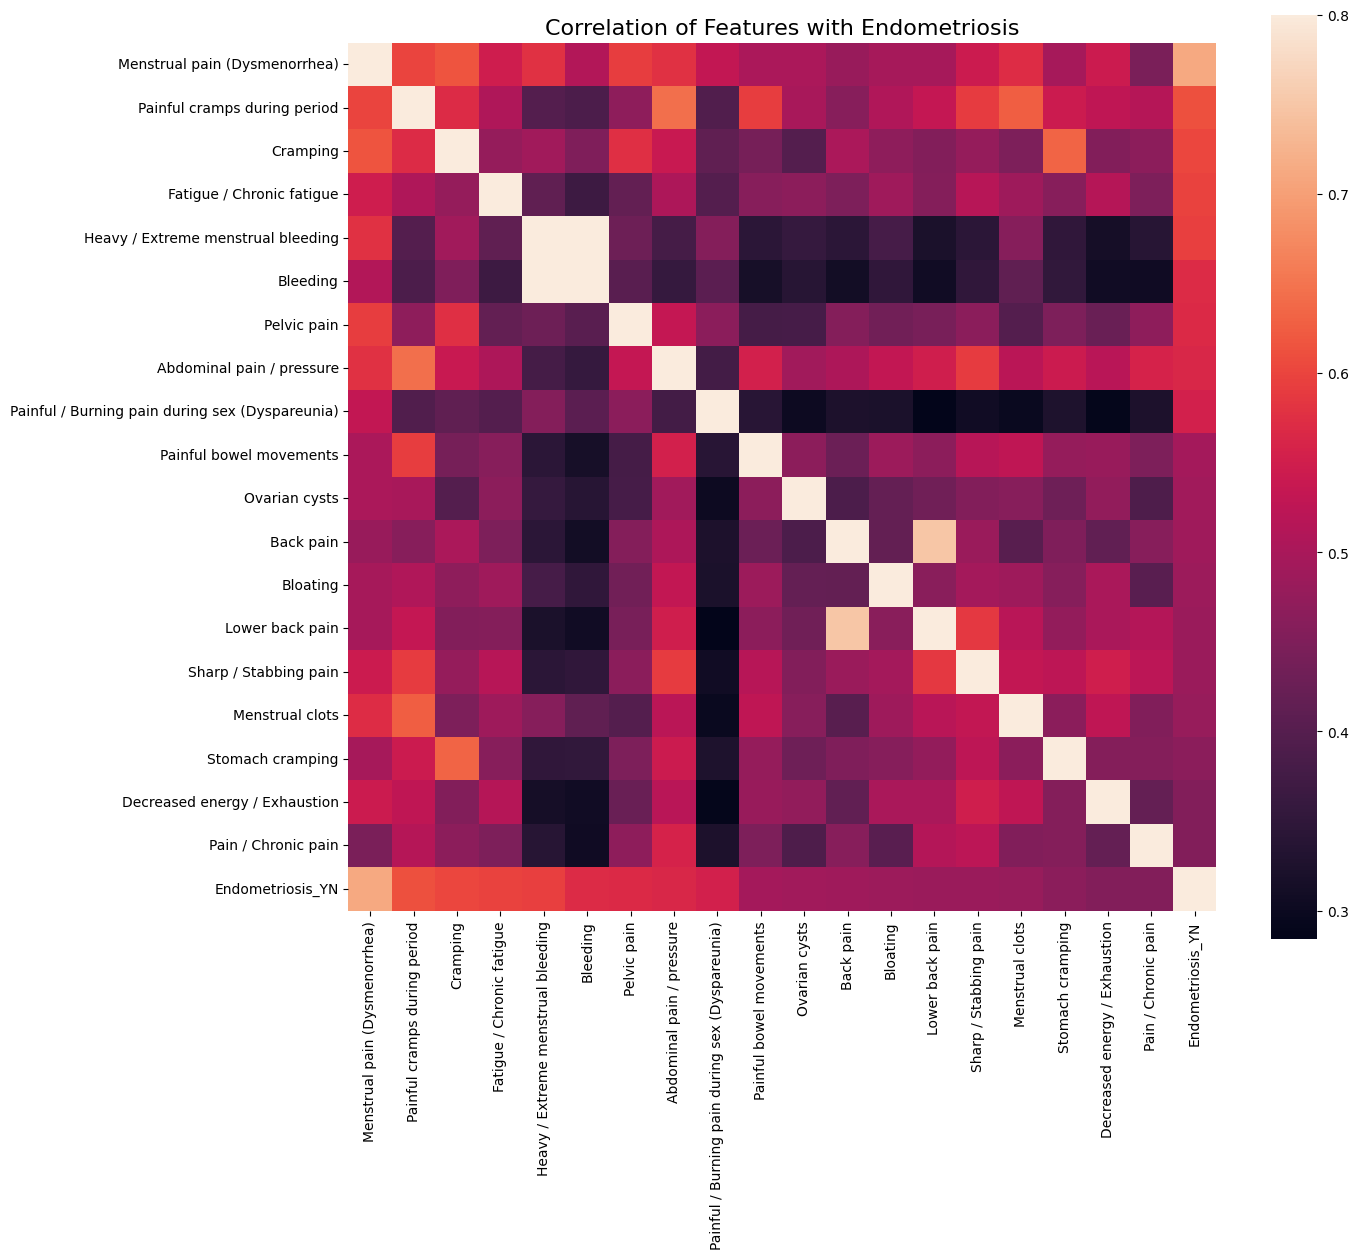

In [88]:
#Correlation plot
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Features with Endometriosis',y=1,size=16)

sns.heatmap(corrMatrix1,square = True,  vmax=0.8)

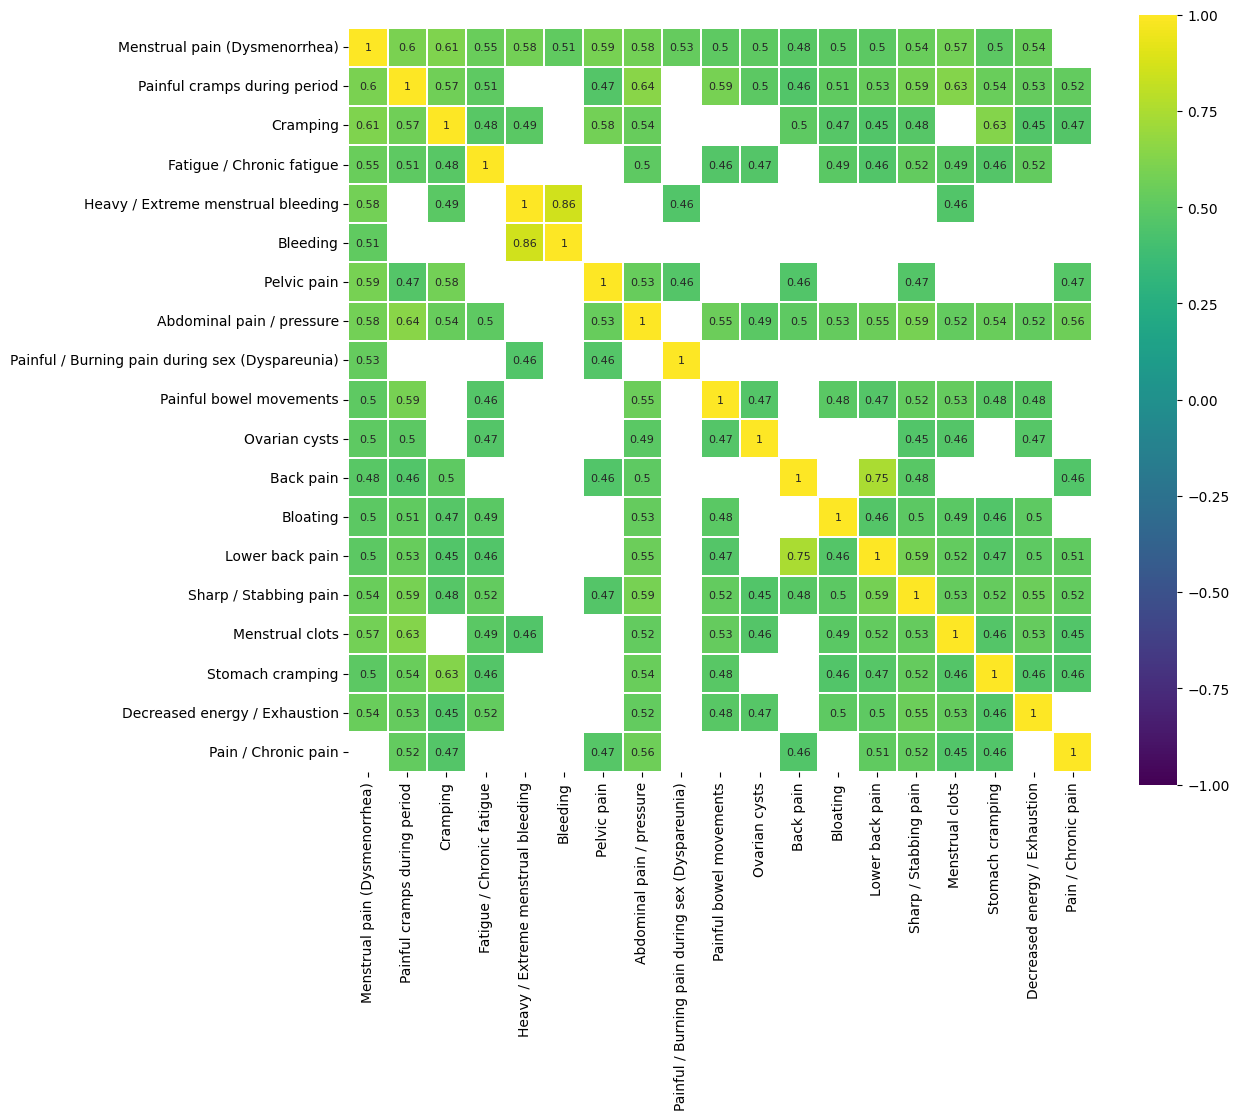

In [26]:
#Correlation plot with corr > 0.45 and < -0.45
corr = df1.drop('Endometriosis_YN', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.45) | (corr <= -0.4)],
                                   cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
                                   annot=True, annot_kws={"size": 8}, square=True);

<h2>Building the solution</h2>

In [89]:
#Normalization
from sklearn import preprocessing
import pandas as pd

scaler = preprocessing.MinMaxScaler()
names = df1.columns
d = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()                                                                                                        

,Menstrual pain (Dysmenorrhea),Painful cramps during period,Cramping,Fatigue / Chronic fatigue,Heavy / Extreme menstrual bleeding,Bleeding,Pelvic pain,Abdominal pain / pressure,Painful / Burning pain during sex (Dyspareunia),Painful bowel movements,Ovarian cysts,Back pain,Bloating,Lower back pain,Sharp / Stabbing pain,Menstrual clots,Stomach cramping,Decreased energy / Exhaustion,Pain / Chronic pain,Endometriosis_YN
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [94]:
#Logistic Regression
#split dataset in features and target variable
feature_cols = ['Menstrual pain (Dysmenorrhea)', 'Painful cramps during period', 'Cramping', 'Fatigue / Chronic fatigue',
       'Heavy / Extreme menstrual bleeding', 'Bleeding', 'Pelvic pain','Abdominal pain / pressure',
          'Painful / Burning pain during sex (Dyspareunia)','Painful bowel movements', 'Ovarian cysts', 'Back pain', 'Bloating',
         'Lower back pain', 'Sharp / Stabbing pain', 'Menstrual clots', 'Stomach cramping', 'Decreased energy / Exhaustion',
         'Pain / Chronic pain']
target_col = ['Endometriosis_YN']
X = df1[feature_cols] # Features
y = df1[target_col] # Target variable

In [95]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [96]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [97]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[102,   4],
       [  8, 108]])

In [98]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 885.5555555555555, 'Predicted label')

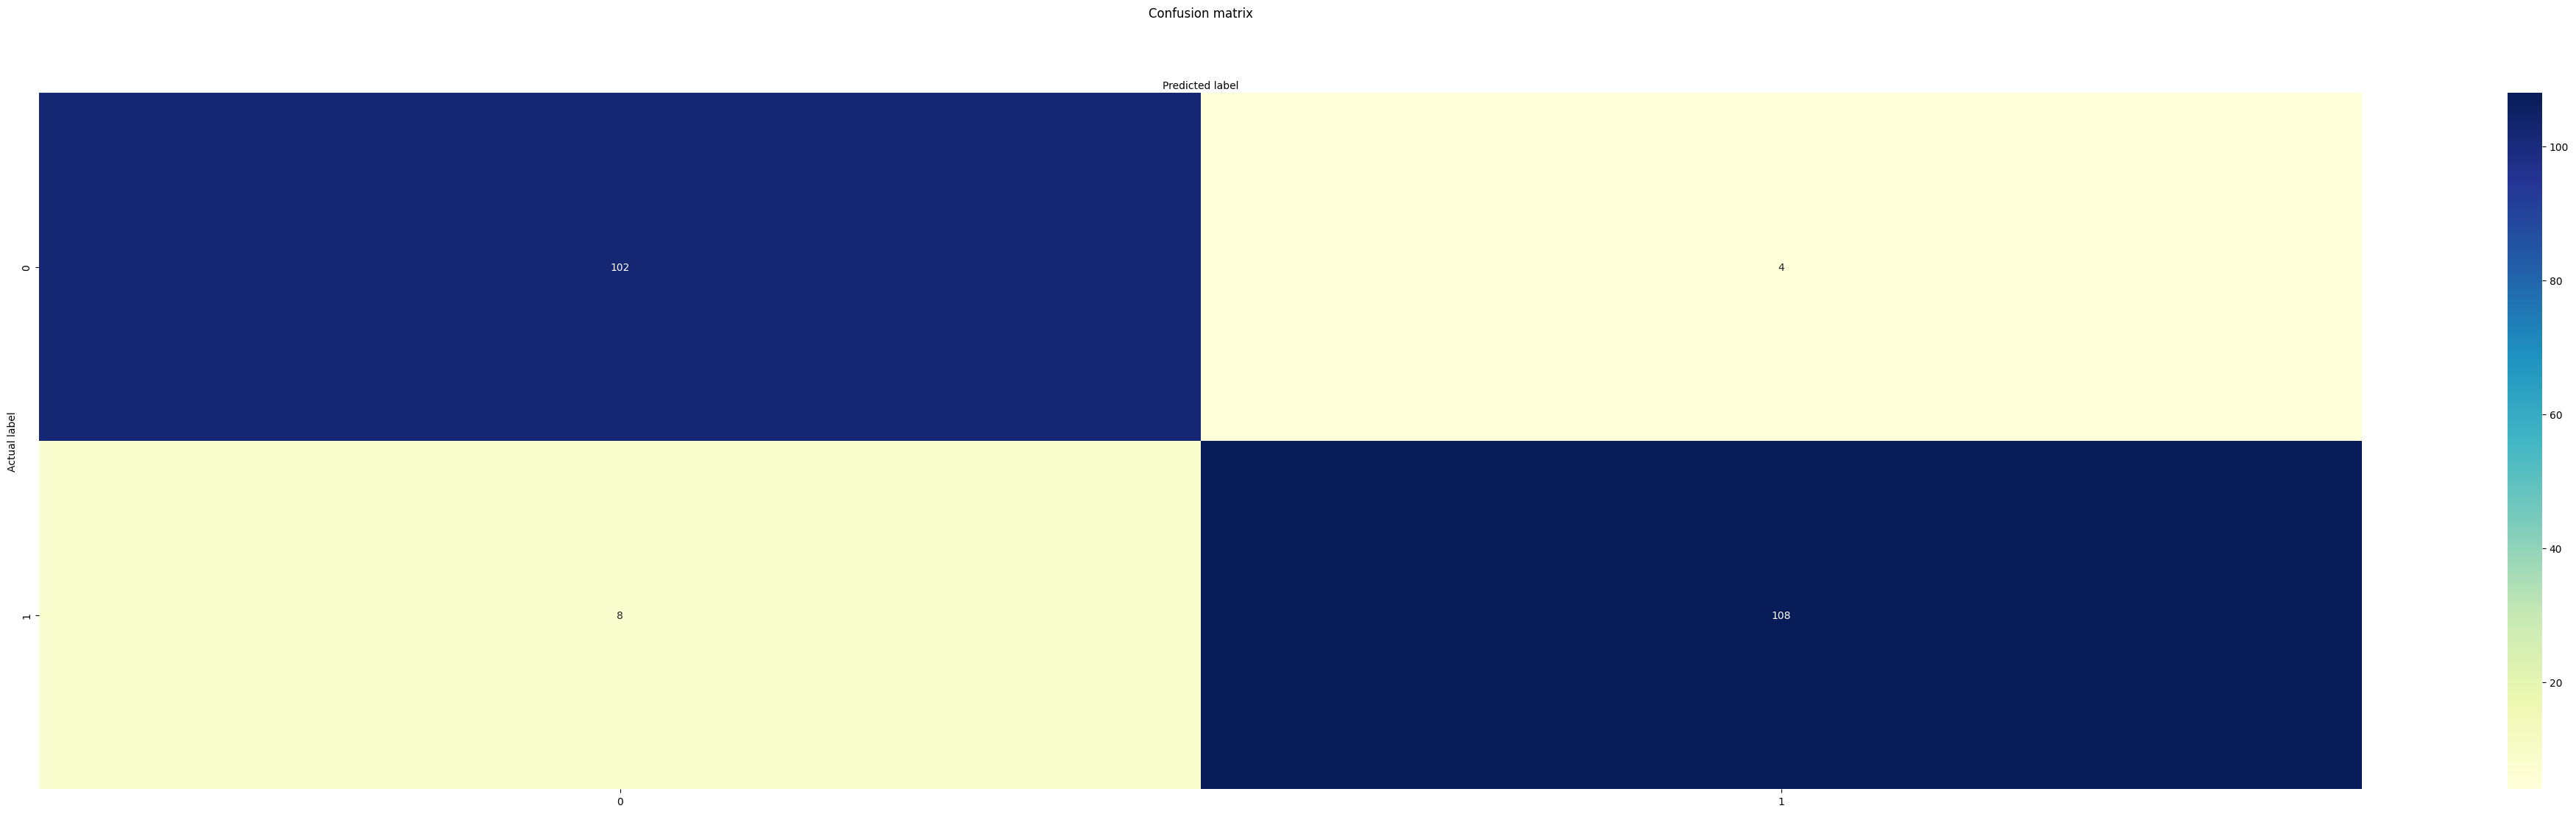

In [99]:
#Confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [100]:
# Accuracy, Precision and Recall scores
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9459459459459459
Precision: 0.9642857142857143
Recall: 0.9310344827586207


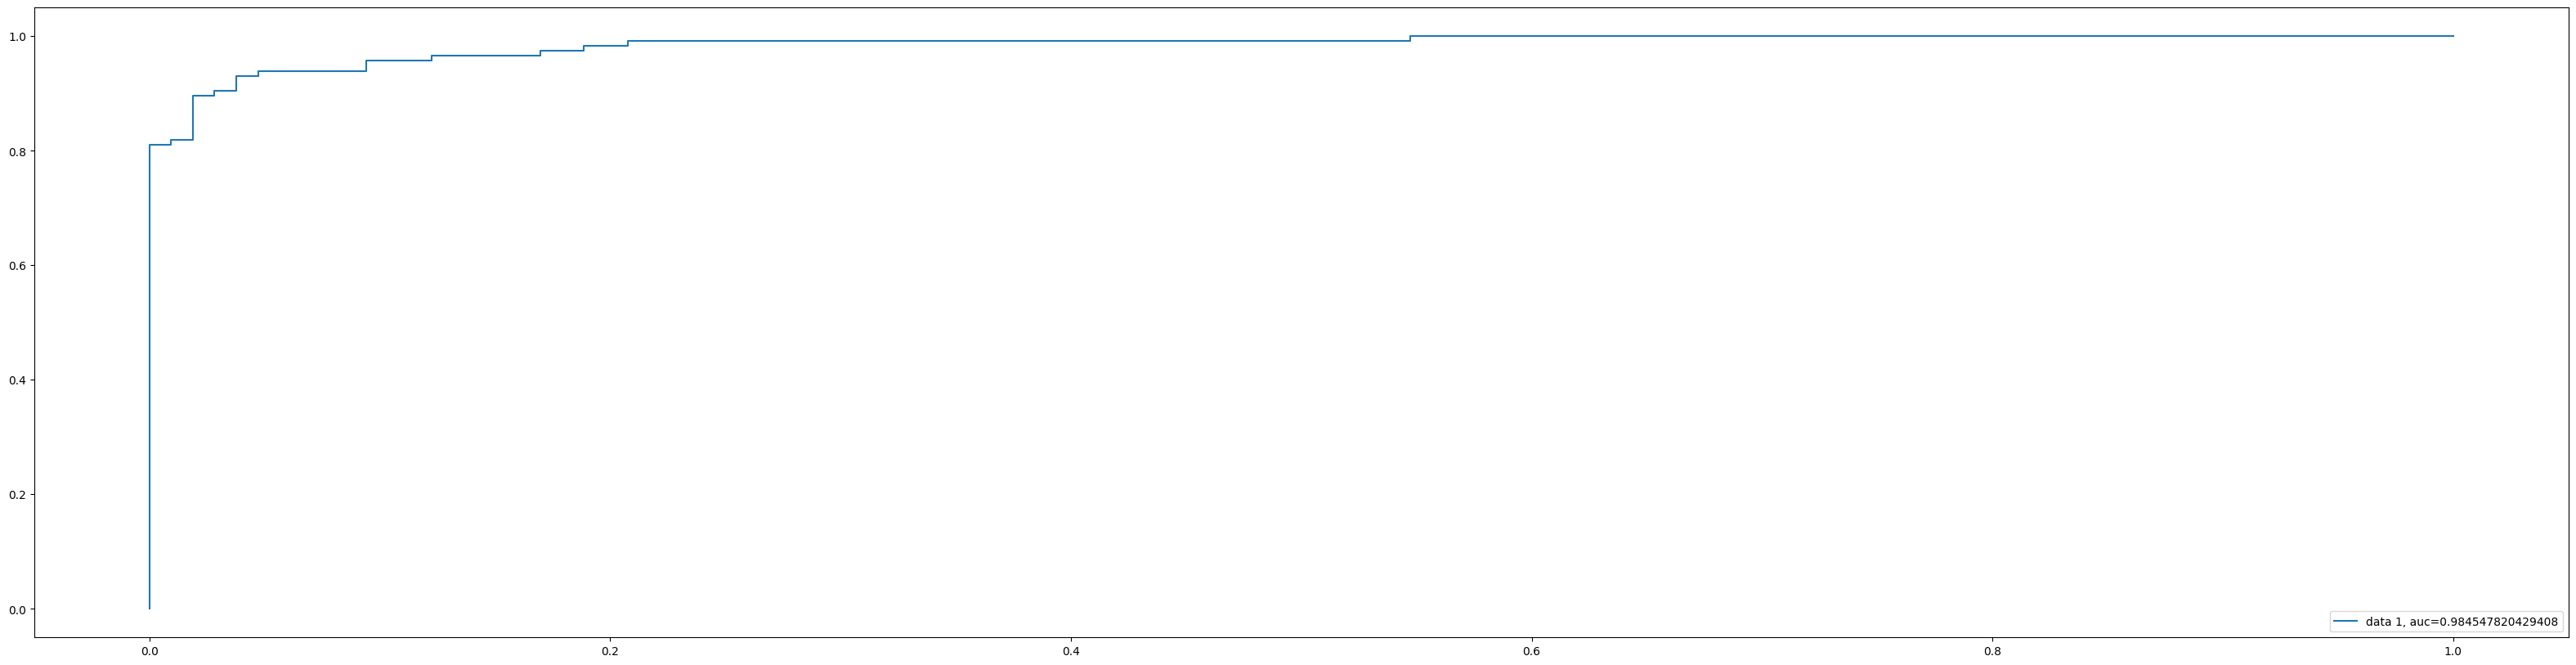

In [101]:
# ROC CURVE
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h3>Classification</h3>

In [110]:
#Random forest
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [111]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

# Convert scores to percentages
accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100

# Print scores as percentages
print("Accuracy: {:.2f}%".format(accuracy_percentage))
print("Precision: {:.2f}%".format(precision_percentage))
print("Recall: {:.2f}%".format(recall_percentage))


Accuracy: 91.89%
Precision: 93.75%
Recall: 90.52%


In [112]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming you have defined feature_cols somewhere earlier in your code
# Assuming you have defined X_train and y_train as your training data
# Fit the classifier to your data
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(X_train, y_train)

# Now you can access feature importances
feature_imp = pd.Series(clf.feature_importances_, index=feature_cols).sort_values(ascending=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


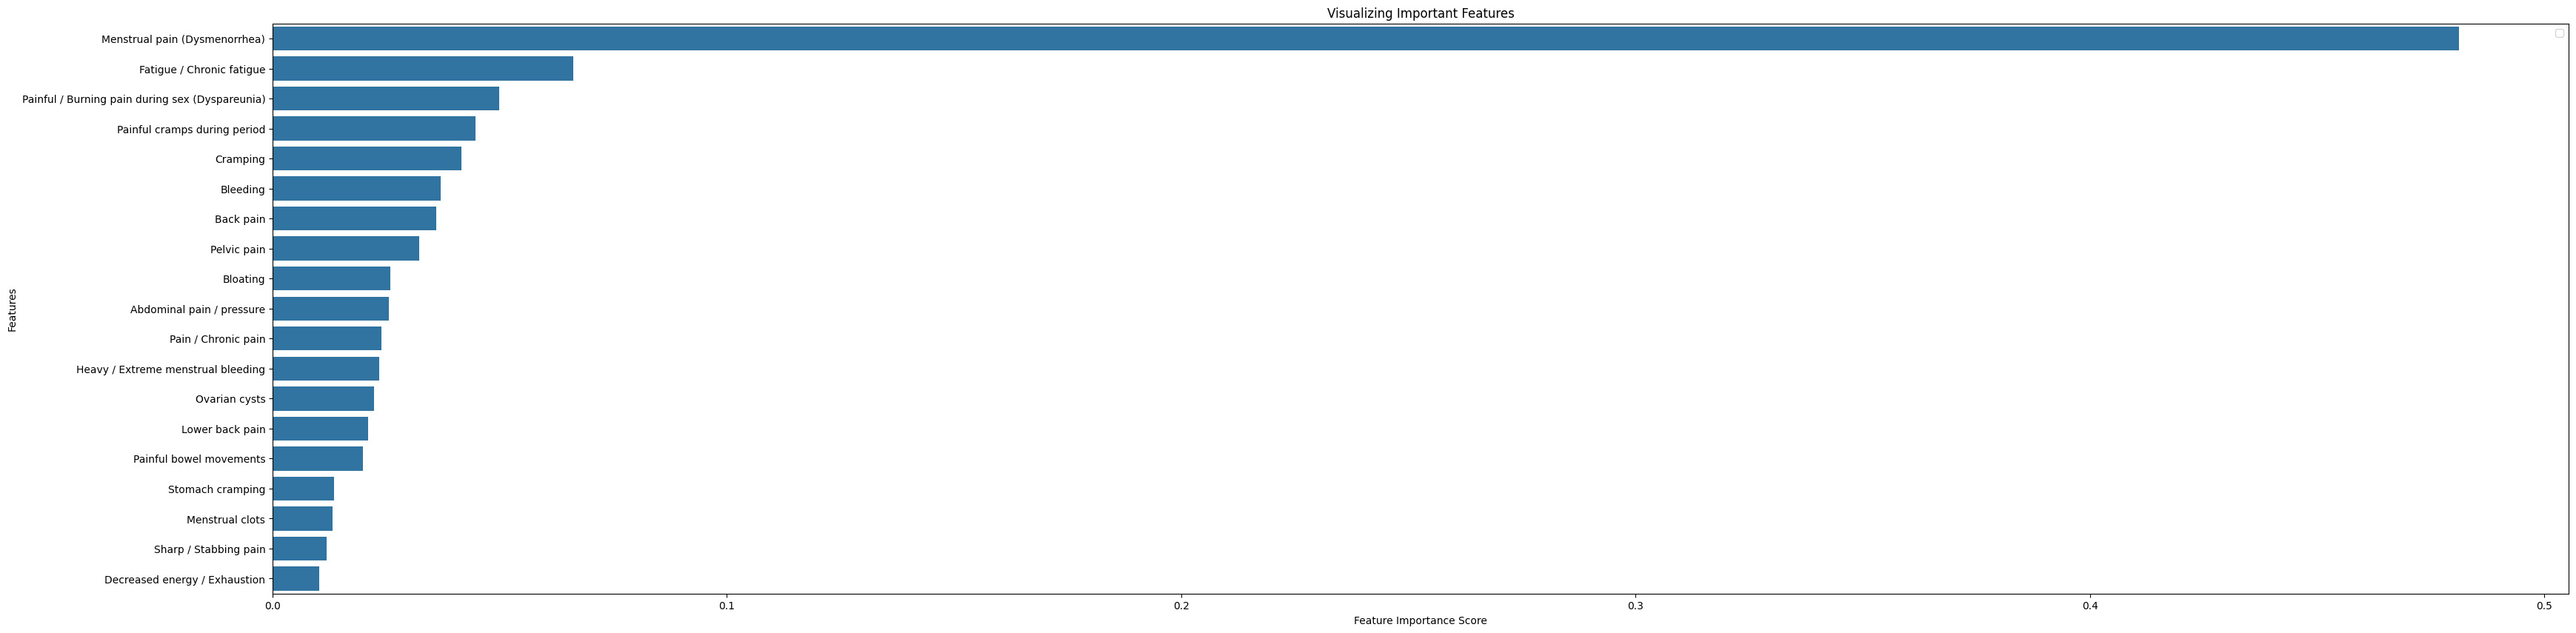

In [113]:
# Feature importance plot for random forest
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [114]:
#XGboost
#pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.345230


In [115]:
#K-fold cross validation using XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [116]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.473620,0.001016,0.474335,0.000541
1,0.455079,0.002233,0.457222,0.001570
2,0.433666,0.002203,0.435954,0.001249
3,0.419644,0.000764,0.422501,0.001082
4,0.402867,0.000906,0.406616,0.000970


In [117]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.289483
Name: test-rmse-mean, dtype: float64


In [118]:
#Visualizing boosting tress and feature importance
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

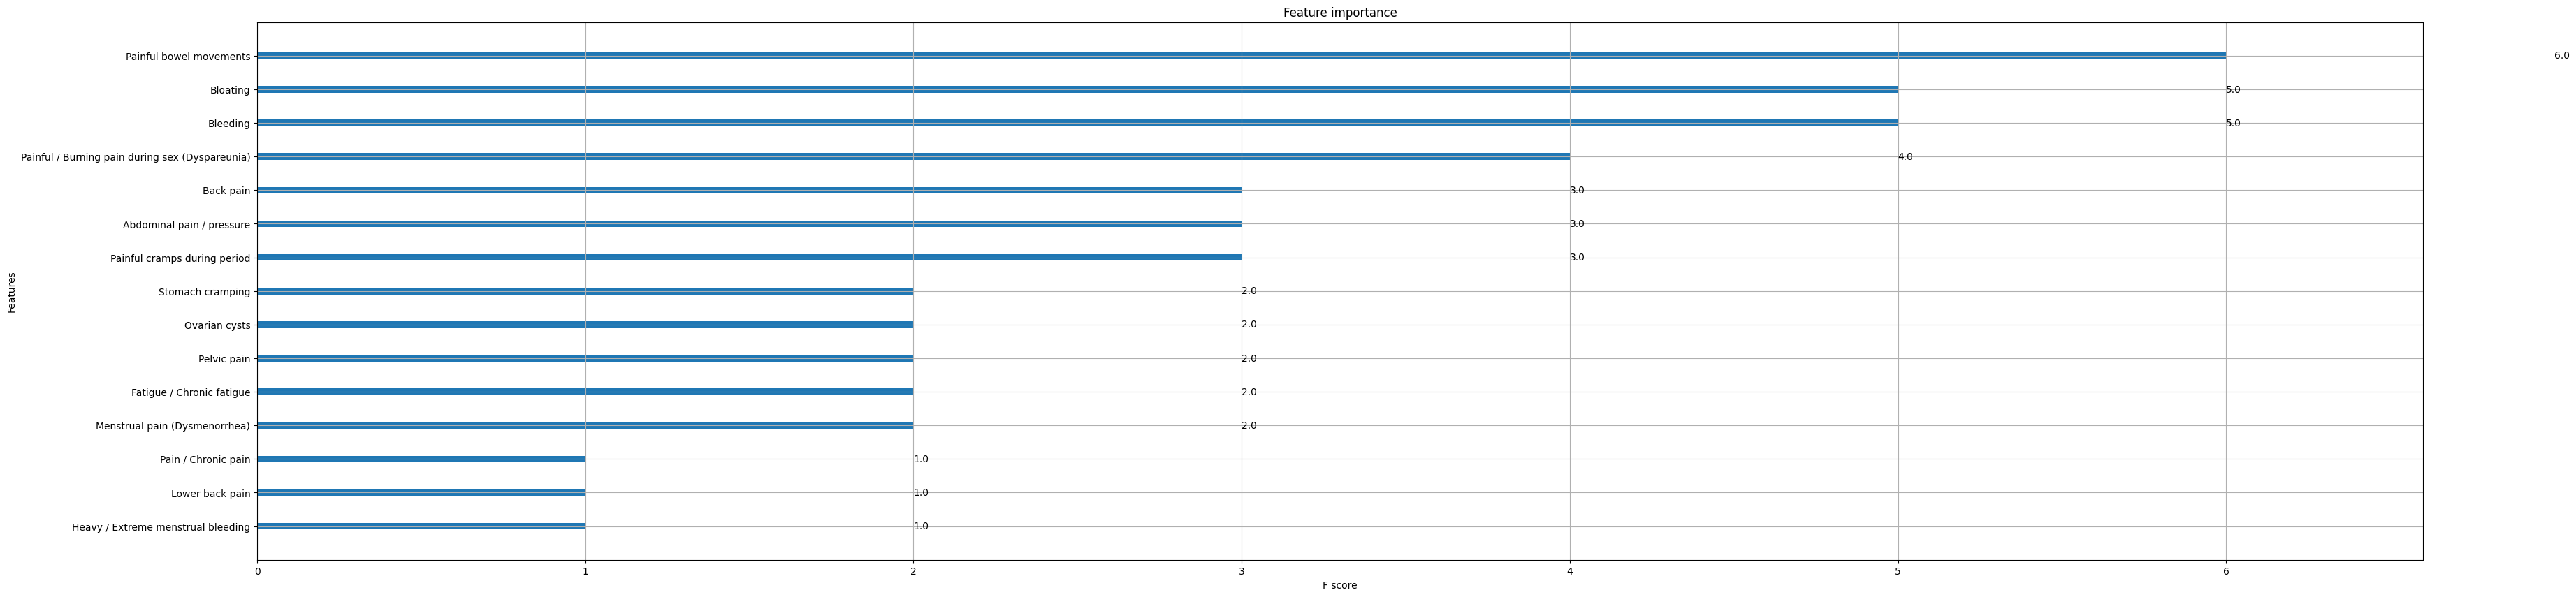

In [119]:
#Feature importance
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [40, 10]
plt.show()

In [120]:
# Decision tree
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [121]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [122]:
# Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 87.84%


In [123]:
#SVM

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [124]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

# Convert scores to percentages
accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100

# Print scores as percentages
print("Accuracy: {:.2f}%".format(accuracy_percentage))
print("Precision: {:.2f}%".format(precision_percentage))
print("Recall: {:.2f}%".format(recall_percentage))

Accuracy: 95.05%
Precision: 97.30%
Recall: 93.10%


<h2> Final Performance - 97.30% precision</h2>